# Enron Scandal Analysis
---
EZ 4.0 | Gabriel Gu | 第一期

---

### 0. 前言

<i>首先感谢您选择EZ4.0旗下的职场课 - `人工智能与数据分析项目`。</i>

在本项目中，你将有机会亲手使用最受欢迎的代码 `python` 完成一次对曾经轰动世界的“安永丑闻”的数据分析。

在处理真实的大数据中，你需要掌握熟练的python调库技巧，用pandas对数据进行多维度的清理和可视化。在整个过程中你需要有明确的目标，运用统计学知识，有创造力的对数据进行建模，对模型进行检验，已得到最终的结论。

最后开始前我想和你说，对于几乎没有统计学和python基础的各位来说，学习起来多少会有难度。但是往往那也是最让人期待的，是你为什么在这个特殊时期依旧愿意求学的意义。现在的努力将会是你未来超越别人的资本。加油吧！

### 1. 故事背景：

**谁是安永：**Enron Corporation, an American energy, commodities and services company, was founded in 1985 and used to be one of the world’s major electricity and natural gas companies with claimed revenues of nearly $101 billion during 2000. Fortune nominated Enron as “American Most Innovative Company” for six consecutive years. (“Enron”, 2017) There is no denying that Enron Corp. reached dramatics heights and with its roots in the universal utility services, the company built a solid reputation for old-economy stability. Lead by one of the smartest business man, Jeffery Skilling(CEO), Enron finally became the largest dominant force in the energy and natural gas sectors with an extensive pipeline network in North America. Undoubtedly, by far, Enron’s story was perfect and splendid. However, not all great stories come with happy endings. Enron eventually faced a dizzying collapse and by the fall of 2000, the company was starting to crumble under its own weight. Actually Enron collapsed so fast that it only took several weeks for this seventh largest company in America to claim a bankruptcy at the end of 2001.

**破产丑闻:** Enron was revealed that its published financial condition was inflated by institutionalized accounting fraud and its income as well as equity value were both overstated by a couple of billion dollars. As revealed by the investigator, the company had made a dozen partner companies and used those companies to hide its financial losses and debts on its trading business. (“The fall of enron”, 2017) The impact of this company bankruptcy was extensive and unprecedented. It wiped out the remaining holdings of thousands of investors and throwed 21,000 people out of work. At the same time, Arthur Andersen, one of the “Big Five” accounting firms in the world, was convicted of complicating in perpetrating one of the biggest frauds in corporate history and later surrendered its CPA licenses on 2002. Not only does this swift collapse have a huge impact on business, but it also had implications for politics. Two federal agencies and more than ten congressional committees were investigated and found guilty of criminal charges. What was going wrong on Enron’s business and how could we prevent it in the future? These two major questions soon became increasingly important to the public.

**In this project, your target is to build a Person of Interest identifier/Label and try to build a Machine Learning Algorithm to predict the possible Persons of Interest based on various features.**



#### 项目完成后，请你回答如下问题：

1. 请你描述你本项目得出的结论，你的目标是什么？
2. 请你描述机器学习算法是怎么帮助你分析目标的。
3. 数据清理过程中，最让你头疼的是哪一步骤？

**回答：**

### 2. Data Initial Exploration

In [1]:
# Initial imports
import sys
import os
import pickle
import re
from time import time
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import warnings
import pprint
warnings.filterwarnings('ignore')

# To show visualizations in iPython
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
### Task: Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as f:
    enron_data = pickle.load(f)

The dataset contains 146 entries as indexes, and 21 features as columns. Each entery, is an observation for a specific person/employee in the company. The features contain financial information for each observation, as well as, their emails addresses.

All observations have 1 more feature called POI. POI is the abbreviated version of Person of Interest. This feature is used to mark whether a specific person in the dataset has been part of the Enron Scandal or not.

In [3]:
# try to run this cell and take a look of dataset

#print(enron_data)

##### What problem did you observe? Do you have any other suggestions to explore the data.



##### What is the data type of enron_data?

In [4]:
# Task: print the data associated with one of the Top execitives - Jeffrey Skilling
pprint.pprint(enron_data)

{'ALLEN PHILLIP K': {'bonus': 4175000,
                     'deferral_payments': 2869717,
                     'deferred_income': -3081055,
                     'director_fees': 'NaN',
                     'email_address': 'phillip.allen@enron.com',
                     'exercised_stock_options': 1729541,
                     'expenses': 13868,
                     'from_messages': 2195,
                     'from_poi_to_this_person': 47,
                     'from_this_person_to_poi': 65,
                     'loan_advances': 'NaN',
                     'long_term_incentive': 304805,
                     'other': 152,
                     'poi': False,
                     'restricted_stock': 126027,
                     'restricted_stock_deferred': -126027,
                     'salary': 201955,
                     'shared_receipt_with_poi': 1407,
                     'to_messages': 2902,
                     'total_payments': 4484442,
                     'total_stock_value': 17295

                         'from_poi_to_this_person': 'NaN',
                         'from_this_person_to_poi': 'NaN',
                         'loan_advances': 'NaN',
                         'long_term_incentive': 415657,
                         'other': 1105,
                         'poi': False,
                         'restricted_stock': 315068,
                         'restricted_stock_deferred': -315068,
                         'salary': 210500,
                         'shared_receipt_with_poi': 'NaN',
                         'to_messages': 'NaN',
                         'total_payments': 1204583,
                         'total_stock_value': 2027865},
 'DIETRICH JANET R': {'bonus': 600000,
                      'deferral_payments': 'NaN',
                      'deferred_income': 'NaN',
                      'director_fees': 'NaN',
                      'email_address': 'janet.dietrich@enron.com',
                      'exercised_stock_options': 1550019,
                 

 'HAEDICKE MARK E': {'bonus': 1150000,
                     'deferral_payments': 2157527,
                     'deferred_income': -934484,
                     'director_fees': 'NaN',
                     'email_address': 'mark.haedicke@enron.com',
                     'exercised_stock_options': 608750,
                     'expenses': 76169,
                     'from_messages': 1941,
                     'from_poi_to_this_person': 180,
                     'from_this_person_to_poi': 61,
                     'loan_advances': 'NaN',
                     'long_term_incentive': 983346,
                     'other': 52382,
                     'poi': False,
                     'restricted_stock': 524169,
                     'restricted_stock_deferred': -329825,
                     'salary': 374125,
                     'shared_receipt_with_poi': 1847,
                     'to_messages': 4009,
                     'total_payments': 3859065,
                     'total_stock_value': 8030

                      'director_fees': 'NaN',
                      'email_address': 'rebecca.mcdonald@enron.com',
                      'exercised_stock_options': 757301,
                      'expenses': 'NaN',
                      'from_messages': 13,
                      'from_poi_to_this_person': 54,
                      'from_this_person_to_poi': 1,
                      'loan_advances': 'NaN',
                      'long_term_incentive': 'NaN',
                      'other': 'NaN',
                      'poi': False,
                      'restricted_stock': 934065,
                      'restricted_stock_deferred': 'NaN',
                      'salary': 'NaN',
                      'shared_receipt_with_poi': 720,
                      'to_messages': 894,
                      'total_payments': 'NaN',
                      'total_stock_value': 1691366},
 'MCMAHON JEFFREY': {'bonus': 2600000,
                     'deferral_payments': 'NaN',
                     'deferred_incom

                                 'exercised_stock_options': 1362375,
                                 'expenses': 'NaN',
                                 'from_messages': 'NaN',
                                 'from_poi_to_this_person': 'NaN',
                                 'from_this_person_to_poi': 'NaN',
                                 'loan_advances': 'NaN',
                                 'long_term_incentive': 554422,
                                 'other': 162,
                                 'poi': False,
                                 'restricted_stock': 'NaN',
                                 'restricted_stock_deferred': 'NaN',
                                 'salary': 162779,
                                 'shared_receipt_with_poi': 'NaN',
                                 'to_messages': 'NaN',
                                 'total_payments': 999356,
                                 'total_stock_value': 1362375},
 'SUNDE MARTIN': {'bonus': 700000,
             

In [5]:
# Task: write code to print the below values


# 1. number of total people in the dataset

human_name = enron_data.keys()
print("Total number of people in the data: " + str(len(human_name)))

# 2. number of features available in the dataset

random_val = enron_data['BOWEN JR RAYMOND M']
print("Total number of features: " + str(len((random_val).keys())))

# 3. list all features

print(random_val.keys())

# 4.number of POIs in the dataset

def count_poi(data):
    count = 0 
    data_keys = data.keys()
    for person in data_keys:
        if data[person]['poi'] == True:
            count += 1
    return count

total_poi_true = count_poi(enron_data)
print("numbers of poi: " + str(total_poi_true))

Total number of people in the data: 146
Total number of features: 21
dict_keys(['salary', 'to_messages', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'email_address', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person', 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees'])
numbers of poi: 18


##### lec2 - Let's try to use pandas dataframe to load the dataset one more time.

In [6]:
# from_dict can convert an dictionary into a dataframe
enron_df = pd.DataFrame.from_dict(enron_data, orient='index')

enron_df.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788,807,NaN,1061827,NaN,600000,mark.metts@enron.com,NaN,NaN,585062,...,38,NaN,29,1740,1,False,NaN,702,585062,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,...,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
ELLIOTT STEVEN,170941,NaN,NaN,211725,NaN,350000,steven.elliott@enron.com,NaN,-400729,6678735,...,NaN,4890344,NaN,12961,NaN,False,NaN,NaN,1788391,NaN
CORDES WILLIAM R,NaN,764,NaN,NaN,NaN,NaN,bill.cordes@enron.com,NaN,NaN,1038185,...,10,651850,12,NaN,0,False,NaN,58,386335,NaN
HANNON KEVIN P,243293,1045,NaN,288682,NaN,1500000,kevin.hannon@enron.com,NaN,-3117011,6391065,...,32,5538001,32,11350,21,True,1617011,1035,853064,NaN


In [7]:
# Task: describe statistics 

enron_df.describe().transpose()

,count,unique,top,freq
salary,146,95,NaN,51
to_messages,146,87,NaN,60
deferral_payments,146,40,NaN,107
total_payments,146,126,NaN,21
loan_advances,146,5,NaN,142
bonus,146,42,NaN,64
email_address,146,112,NaN,35
restricted_stock_deferred,146,19,NaN,128
deferred_income,146,45,NaN,97
total_stock_value,146,125,NaN,20


##### As referenced by the `describe()` function sheme, it displays more information including quantile, mean, std and much more. But the above tables seem to miss some of them.

##### What do you think the reason is?

Answer:

### 3. Clean `NaN` Values

##### In real world data analysis, it is nearly imposible for you to have perfectly filled in dataset. A records not recored in dataframe is usually expressed as `NaN`.

##### However, we cannot perform changes on `NaN` and may have to convert it to `""` or `0` according to the column type.

In [8]:
# print the number of null entries for each column.
# hint: df.isnull() 
print("Amount of NaN values in the dataset: {}".format(enron_df.isnull().sum()))

Amount of NaN values in the dataset: salary                       0
to_messages                  0
deferral_payments            0
total_payments               0
loan_advances                0
bonus                        0
email_address                0
restricted_stock_deferred    0
deferred_income              0
total_stock_value            0
expenses                     0
from_poi_to_this_person      0
exercised_stock_options      0
from_messages                0
other                        0
from_this_person_to_poi      0
poi                          0
long_term_incentive          0
shared_receipt_with_poi      0
restricted_stock             0
director_fees                0
dtype: int64


In [9]:
# Tasks: clean NaN
enron_df.fillna(0, inplace=True)
enron_df.replace(to_replace='NaN', value=0.0, inplace=True)


In [10]:
# Task: check if your NaN is all gone?

In [11]:
# re-run this cell so you can have more information
enron_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
salary,146.0,3.658114e+05,2.203575e+06,0.0,0.00,210596.0,270850.50,26704229.0
to_messages,146.0,1.221589e+03,2.226771e+03,0.0,0.00,289.0,1585.75,15149.0
deferral_payments,146.0,4.387965e+05,2.741325e+06,-102500.0,0.00,0.0,9684.50,32083396.0
total_payments,146.0,4.350622e+06,2.693448e+07,0.0,93944.75,941359.5,1968286.75,309886585.0
loan_advances,146.0,1.149658e+06,9.649342e+06,0.0,0.00,0.0,0.00,83925000.0
bonus,146.0,1.333474e+06,8.094029e+06,0.0,0.00,300000.0,800000.00,97343619.0
restricted_stock_deferred,146.0,2.051637e+04,1.439661e+06,-7576788.0,0.00,0.0,0.00,15456290.0
deferred_income,146.0,-3.827622e+05,2.378250e+06,-27992891.0,-37926.00,0.0,0.00,0.0
total_stock_value,146.0,5.846018e+06,3.624681e+07,-44093.0,228869.50,965955.0,2319991.25,434509511.0
expenses,146.0,7.074827e+04,4.327163e+05,0.0,0.00,20182.0,53740.75,5235198.0


### 4. More Cleaning - duplicates

Duplicates in our dataset shall be removed as the first step of data analyst.

In [12]:
# Task: find a function that can drop the duplicates in rows
enron_df.drop_duplicates()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788.0,807.0,0.0,1061827.0,0.0,600000.0,mark.metts@enron.com,0.0,0.0,585062.0,...,38.0,0.0,29.0,1740.0,1.0,False,0.0,702.0,585062.0,0.0
BAXTER JOHN C,267102.0,0.0,1295738.0,5634343.0,0.0,1200000.0,0,0.0,-1386055.0,10623258.0,...,0.0,6680544.0,0.0,2660303.0,0.0,False,1586055.0,0.0,3942714.0,0.0
ELLIOTT STEVEN,170941.0,0.0,0.0,211725.0,0.0,350000.0,steven.elliott@enron.com,0.0,-400729.0,6678735.0,...,0.0,4890344.0,0.0,12961.0,0.0,False,0.0,0.0,1788391.0,0.0
CORDES WILLIAM R,0.0,764.0,0.0,0.0,0.0,0.0,bill.cordes@enron.com,0.0,0.0,1038185.0,...,10.0,651850.0,12.0,0.0,0.0,False,0.0,58.0,386335.0,0.0
HANNON KEVIN P,243293.0,1045.0,0.0,288682.0,0.0,1500000.0,kevin.hannon@enron.com,0.0,-3117011.0,6391065.0,...,32.0,5538001.0,32.0,11350.0,21.0,True,1617011.0,1035.0,853064.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRAMM WENDY L,0.0,0.0,0.0,119292.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,119292.0
CAUSEY RICHARD A,415189.0,1892.0,0.0,1868758.0,0.0,1000000.0,richard.causey@enron.com,0.0,-235000.0,2502063.0,...,58.0,0.0,49.0,307895.0,12.0,True,350000.0,1585.0,2502063.0,0.0
TAYLOR MITCHELL S,265214.0,533.0,227449.0,1092663.0,0.0,600000.0,mitchell.taylor@enron.com,0.0,0.0,3745048.0,...,0.0,3181250.0,29.0,0.0,0.0,False,0.0,300.0,563798.0,0.0
DONAHUE JR JEFFREY M,278601.0,865.0,0.0,875760.0,0.0,800000.0,jeff.donahue@enron.com,0.0,-300000.0,1080988.0,...,188.0,765920.0,22.0,891.0,11.0,False,0.0,772.0,315068.0,0.0


### 5. Outlier Removal

Now we will consider a few features where having outliers can significantly affect our whole analysis. We will analyze these outliers to see whether they should be there or we can remove them to make our analysis more robust.



##### What's your observation?

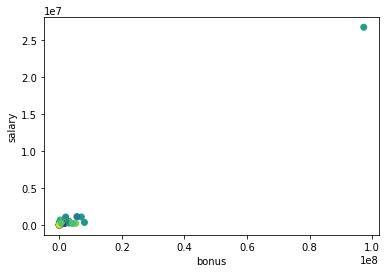

In [13]:
# Task：seperate bonus and salary from data variable

bonus = enron_df['bonus']
salary = enron_df['salary']

# Challenge: can you get the bonus and salary using one line code (you should consider numpy array)

# Task: draw scatter plot
# plt.scatter(...)
colors = np.random.rand(len(bonus))
plt.scatter(bonus, salary, c=colors)
plt.xlabel("bonus")
plt.ylabel("salary")
plt.show()

##### Wow, there is an insane amount there. 

##### Run the below cell, and you will actually observe there is a key "Total" that represents the total value added for each column. Maybe that's the reason why we have this outlier

In [14]:
# Run me
enron_df.loc['TOTAL']

salary                       2.67042e+07
to_messages                            0
deferral_payments            3.20834e+07
total_payments               3.09887e+08
loan_advances                 8.3925e+07
bonus                        9.73436e+07
email_address                          0
restricted_stock_deferred   -7.57679e+06
deferred_income             -2.79929e+07
total_stock_value             4.3451e+08
expenses                      5.2352e+06
from_poi_to_this_person                0
exercised_stock_options      3.11764e+08
from_messages                          0
other                        4.26676e+07
from_this_person_to_poi                0
poi                                False
long_term_incentive          4.85219e+07
shared_receipt_with_poi                0
restricted_stock             1.30322e+08
director_fees                1.39852e+06
Name: TOTAL, dtype: object

##### So we are curious about what the actual maximum bonus and salary are. Think about how you can get the max bonus as well as the total bonus?

Solution: We can calculate the max[total] and second max[actual max bonus] value in the data.

In [15]:
# Task: verify by getting the total and max value of bonus (dont use dataframe)

enron_df['bonus'].max()

def get_total_and_max(dataset):
    if len(dataset) == 0:
        return 0, 0
    max_v = dataset[0]
    second_max_v = dataset[0]
    
    for data in dataset:
        """
        if new value > both max_v and second_max_v:
            max_v = new value
            second_max_v = old max_v
        elif new_value > only second_max_v
            second_max_v = new_value
        else:
            nothing
        """
        if data > max_v and data > second_max_v:
            second_max_v = max_v
            max_v = data
        elif data > second_max_v:
            second_max_v = data
        
    return max_v, second_max_v    

tot_sal, max_sal = get_total_and_max(salary)
tot_bonus, max_bonus = get_total_and_max(bonus)

print("total salary: " + str(tot_sal) + ", max salary: " + str(max_sal))
print("total bonus: " + str(tot_bonus) + ", max bonus: " + str(max_bonus))



total salary: 26704229.0, max salary: 1111258.0
total bonus: 97343619.0, max bonus: 8000000.0


##### Now, the data makes more sense.

##### Okay, so we will redraw the scatter plot by removing the outlier "TOTAL". **During the removal, we should also not include the data that is meaningless to our anlysis**. 

For example, another key we should exclude is `" THE TRAVEL AGENCY IN THE PARK "`. Can you image why?

**Solution:** It does not belong to any individual.

In [16]:
# Task: Remove outliers in enron_data
# Hint: We can quickly drop the key value pair in dictionary through function .pop(). Try it
#enron_data.pop('TOTAL')
#enron_data.pop('THE TRAVEL AGENCY IN THE PARK')

# if we rerun this cell, we will get an error. 
# Challenge: that is because we are trying to remove a key not exist. Try to search online and see how you can fix this.

# enron_data.pop('TOTAL', 0)
# enron_data.pop('THE TRAVEL AGENCY IN THE PARK', 0)


In [17]:
# Task: don't forget we also need to remove those two rows from dataframe
enron_df.drop(['TOTAL'], axis = 0, inplace=True)
enron_df.drop(['THE TRAVEL AGENCY IN THE PARK'], axis = 0, inplace=True)

In [18]:
# Task: remove outliers in array bonus and salary in order to draw the scatter plot 
# try to google "how to remove specific value in a list python"
bonus = bonus.tolist()
salary = salary.tolist()

bonus.remove(tot_bonus)
salary.remove(tot_sal)

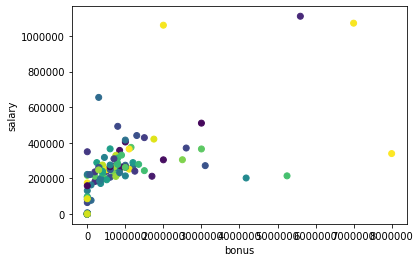

In [19]:
# Task: redraw the scatter plot again

colors = np.random.rand(len(bonus))
plt.scatter(bonus, salary, c=colors)
plt.xlabel("bonus")
plt.ylabel("salary")
plt.show()

### Decision Tree Classifier

In [20]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

In [21]:
# Selecting all the features 

features_list = ['to_messages', 'deferral_payments', 
                 'loan_advances', 'restricted_stock_deferred',
                 'deferred_income', 'total_stock_value', 'expenses',
                 'from_poi_to_this_person', 'exercised_stock_options', 'from_messages',
                 'other', 'from_this_person_to_poi', 'long_term_incentive',
                 'restricted_stock', 'director_fees'
                 ]

# Task: generate labels and featues
labels = enron_df["poi"].tolist()
features = enron_df[features_list].values.tolist()

In [22]:
# Split data into trainings and testings
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2)

In [23]:
# Task: train your decision tree model

clf = tree.DecisionTreeClassifier()#criterion='entropy')
clf = clf.fit(features_train, labels_train)

In [24]:
# Tas: check the accuracy scores
predictions = clf.predict(features_test)
accuracy_score(labels_test, predictions)

0.8275862068965517

In [25]:
# Task: predict the results

predictions

array([False, False, False, False, False, False,  True, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [27]:
labels_test

29